In [51]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [42]:
# Take command line arguments
# command line argument inputs: flag, dimension, input file
# import sys
# flag = sys.argv[1]
# dim = int(sys.argv[2])
# input_file = sys.argv[3]


In [52]:
# Standard Matrix Multiplication 
def standard_matrix_multiplication(X, Y):
    n = X.shape[0]
    Z = np.zeros((n, n))  
    
    for i in range(n):
        for j in range(n):
            Z[i, j] = np.sum(X[i, :] * Y[:, j])
    
    return Z

In [53]:
# Strassen's Matrix Multiplication
def strassen_matrix_multiplication(X, Y):
    n = X.shape[0]
    if n == 1:
        return X * Y  # Assuming scalar multiplication is intended
    
    A = X[:n//2, :n//2]
    B = X[:n//2, n//2:]
    C = X[n//2:, :n//2]
    D = X[n//2:, n//2:]
    
    E = Y[:n//2, :n//2]
    F = Y[:n//2, n//2:]
    G = Y[n//2:, :n//2]
    H = Y[n//2:, n//2:]
    
    P1 = strassen_matrix_multiplication(A, F - H)
    P2 = strassen_matrix_multiplication(A + B, H)
    P3 = strassen_matrix_multiplication(C + D, E)
    P4 = strassen_matrix_multiplication(D, G - E)
    P5 = strassen_matrix_multiplication(A + D, E + H)
    P6 = strassen_matrix_multiplication(B - D, G + H)
    P7 = strassen_matrix_multiplication(A - C, E + F)
    
    Z = np.zeros((n, n))
    Z[:n//2, :n//2] = P5 + P4 - P2 + P6
    Z[:n//2, n//2:] = P1 + P2
    Z[n//2:, :n//2] = P3 + P4
    Z[n//2:, n//2:] = P1 + P5 - P3 - P7
    
    return Z

In [47]:
# Testing 
X = np.array([[1, 2], [3, 4]])
Y = np.array([[5, 6], [7, 8]])

Z1 = standard_matrix_multiplication(X, Y)
Z2 = strassen_matrix_multiplication(X, Y)
print(Z1)
print(Z2)

[[19. 22.]
 [43. 50.]]
[[19. 22.]
 [43. 50.]]


In [ ]:
# def generate_random_matrix(n):
#     return np.random.rand(n, n)

# def test_strassen_runtime():
#     ns = [2**i for i in range(1, 11)]  # Values of n to test
#     times = []
#     for n in ns:
#         X = generate_random_matrix(n)
#         Y = generate_random_matrix(n)
#         start_time = time.time()
#         strassen_matrix_multiplication(X, Y)
#         end_time = time.time()
#         times.append(end_time - start_time)
    
#     plt.plot(ns, times, marker='o')
#     # plt.xscale('log', basex=2)
#     # plt.yscale('log')
#     plt.xlabel('Matrix Size (n)')
#     plt.ylabel('Runtime (seconds)')
#     plt.title('Runtime of Strassen\'s Matrix Multiplication')
#     plt.grid(True)
#     plt.show()

# # Now we'll run the test function
# test_strassen_runtime()

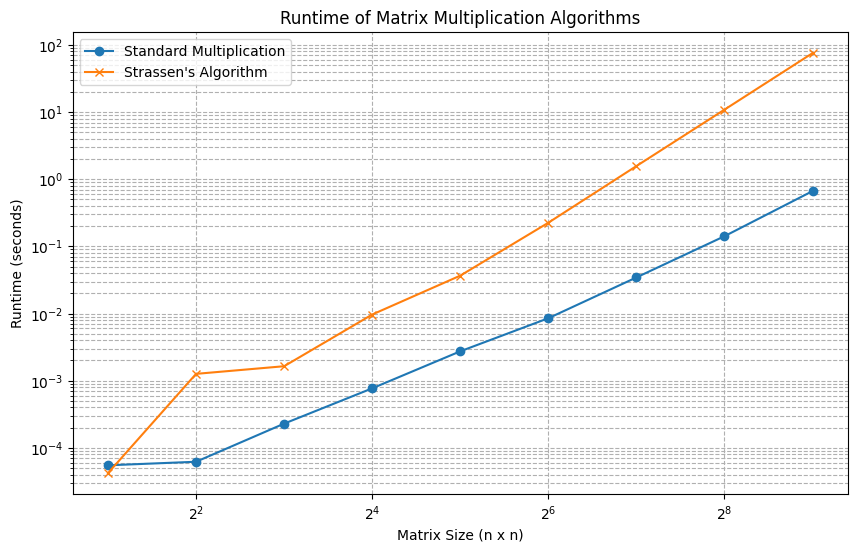

In [55]:
# Matrix sizes to test
sizes = [2**i for i in range(1, 10)]  # Adjust upper limit for computational feasibility
standard_times = []
strassen_times = []

for size in sizes:
    X = np.random.rand(size, size)
    Y = np.random.rand(size, size)
    
    start = time.time()
    standard_matrix_multiplication(X, Y)
    end = time.time()
    standard_times.append(end - start)
    
    start = time.time()
    strassen_matrix_multiplication(X, Y)
    end = time.time()
    strassen_times.append(end - start)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, standard_times, label='Standard Multiplication', marker='o')
plt.plot(sizes, strassen_times, label='Strassen\'s Algorithm', marker='x')
plt.xlabel('Matrix Size (n x n)')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime of Matrix Multiplication Algorithms')
plt.legend()
plt.xscale('log', base=2)
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()